<a href="https://colab.research.google.com/github/soumita20/MDS-Daekin/blob/main/AcuteInflammations_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us first download all necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
)

Now, we will read the inflammation data into a dataset "inflammations_df". Since the dataset does not have headers, we will set header=None while reading the dataset so that headers are auto assigned

In [5]:
#Setting column names for the data since headers are not present
col_names = ["temperature","HasNausea","HasLumbarPain","HasContinuousUrgeToUrinate","HasMicturitionPain","HasDiscomfortInUrethra","BladderInflammation","HasNephritises"]

In [6]:
inflammations_df = pd.read_csv("/content/diagnosis.data",  encoding = 'utf-16', sep="\t", names = col_names)
inflammations_df.head()

,temperature,HasNausea,HasLumbarPain,HasContinuousUrgeToUrinate,HasMicturitionPain,HasDiscomfortInUrethra,BladderInflammation,HasNephritises
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


Let us check the shape of the dataset.

In [7]:
inflammations_df.shape

(120, 8)

We can see that this dataset has 120 rows and 8 features. Going ahead, we will also name the features of the dataset based on the description provided.

Let us also check for missing values in the dataset.

In [8]:
inflammations_df.isna().sum()

temperature                   0
HasNausea                     0
HasLumbarPain                 0
HasContinuousUrgeToUrinate    0
HasMicturitionPain            0
HasDiscomfortInUrethra        0
BladderInflammation           0
HasNephritises                0
dtype: int64

We can see that there are no missing values in the dataset.

Let us now take a look at the distribution of those who have inflammation of the bladder and those who have nephritises.

In [9]:
inflammations_df["BladderInflammation"].value_counts()

no     61
yes    59
Name: BladderInflammation, dtype: int64

In [10]:
inflammations_df["HasNephritises"].value_counts()

no     70
yes    50
Name: HasNephritises, dtype: int64

We can see there are 59 people who have been diagnosed with bladder information and 50 people have been diagnosed with acute nephritises.

Let us now take a look at the column types of the dataframe

In [11]:
inflammations_df.dtypes

temperature                   object
HasNausea                     object
HasLumbarPain                 object
HasContinuousUrgeToUrinate    object
HasMicturitionPain            object
HasDiscomfortInUrethra        object
BladderInflammation           object
HasNephritises                object
dtype: object

Since all of the features are categorical in nature, let us convert all the "yes" and "no" values to 0 and 1.

In [12]:
inflammations_df =inflammations_df.replace(['yes'], 1)
inflammations_df =inflammations_df.replace(['no'], 0)

Let us now take a look at the temperature column separately

In [13]:
inflammations_df["temperature"].unique()

array(['35,5', '35,9', '36,0', '36,2', '36,3', '36,6', '36,7', '36,8',
       '36,9', '37,0', '37,1', '37,2', '37,3', '37,4', '37,5', '37,6',
       '37,7', '37,8', '37,9', '38,0', '38,1', '38,3', '38,5', '38,7',
       '38,9', '39,0', '39,4', '39,7', '40,0', '40,1', '40,2', '40,3',
       '40,4', '40,5', '40,6', '40,7', '40,8', '40,9', '41,0', '41,1',
       '41,2', '41,3', '41,4', '41,5'], dtype=object)

In [14]:
inflammations_df["temperature"] = inflammations_df["temperature"].str.replace(',', '.').astype(float)

Let us also categorise the temperature column into 3 categories for ease of categorising:

<=37.5 - Normal 

>=37.5 and <=39.5 - Medium

>=39.5 and <=41.5 - High

In [15]:
inflammations_df["temperature"].unique()

array([35.5, 35.9, 36. , 36.2, 36.3, 36.6, 36.7, 36.8, 36.9, 37. , 37.1,
       37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1, 38.3,
       38.5, 38.7, 38.9, 39. , 39.4, 39.7, 40. , 40.1, 40.2, 40.3, 40.4,
       40.5, 40.6, 40.7, 40.8, 40.9, 41. , 41.1, 41.2, 41.3, 41.4, 41.5])

Now, let us check the correlation between all the features with the target variables "BladderInflammation" and "HasNephritises".

In [16]:
category = pd.cut(inflammations_df.temperature,bins=[0,37.5,39.5,41.5],labels=[0,1,2])
inflammations_df.insert(1,"Temperature_Range",category.astype(int))

In [17]:
inflammations_df.head()

,temperature,Temperature_Range,HasNausea,HasLumbarPain,HasContinuousUrgeToUrinate,HasMicturitionPain,HasDiscomfortInUrethra,BladderInflammation,HasNephritises
0,35.5,0,0,1,0,0,0,0,0
1,35.9,0,0,0,1,1,1,1,0
2,35.9,0,0,1,0,0,0,0,0
3,36.0,0,0,0,1,1,1,1,0
4,36.0,0,0,1,0,0,0,0,0


In [18]:
inflammations_df["Temperature_Range"].value_counts()

2    51
0    45
1    24
Name: Temperature_Range, dtype: int64

We can see that there are 51 with high temperature, 24 patients with medium temperature and 45 patients with normal temperature

Next step, I will drop the temperature column from the dataset as we now have the temperature range.

In [19]:
inflammations_df.drop(["temperature"],axis=1,inplace=True)

In [20]:
inflammations_df.dtypes

Temperature_Range             int64
HasNausea                     int64
HasLumbarPain                 int64
HasContinuousUrgeToUrinate    int64
HasMicturitionPain            int64
HasDiscomfortInUrethra        int64
BladderInflammation           int64
HasNephritises                int64
dtype: object

In [21]:
inflammations_df.corr()

,Temperature_Range,HasNausea,HasLumbarPain,HasContinuousUrgeToUrinate,HasMicturitionPain,HasDiscomfortInUrethra,BladderInflammation,HasNephritises
Temperature_Range,1.000000,0.600533,0.388020,-0.019795,0.094262,0.028392,-0.223055,0.728721
HasNausea,0.600533,1.000000,0.477105,-0.013765,0.574007,-0.121744,0.184630,0.667947
HasLumbarPain,0.388020,0.477105,1.000000,-0.239046,-0.183142,0.028571,-0.521251,0.714286
HasContinuousUrgeToUrinate,-0.019795,-0.013765,-0.239046,1.000000,0.341816,0.597614,0.695418,0.239046
HasMicturitionPain,0.094262,0.574007,-0.183142,0.341816,1.000000,0.149331,0.666574,0.149331
HasDiscomfortInUrethra,0.028392,-0.121744,0.028571,0.597614,0.149331,1.000000,0.149331,0.314286
BladderInflammation,-0.223055,0.184630,-0.521251,0.695418,0.666574,0.149331,1.000000,-0.188777
HasNephritises,0.728721,0.667947,0.714286,0.239046,0.149331,0.314286,-0.188777,1.000000


<Axes: >

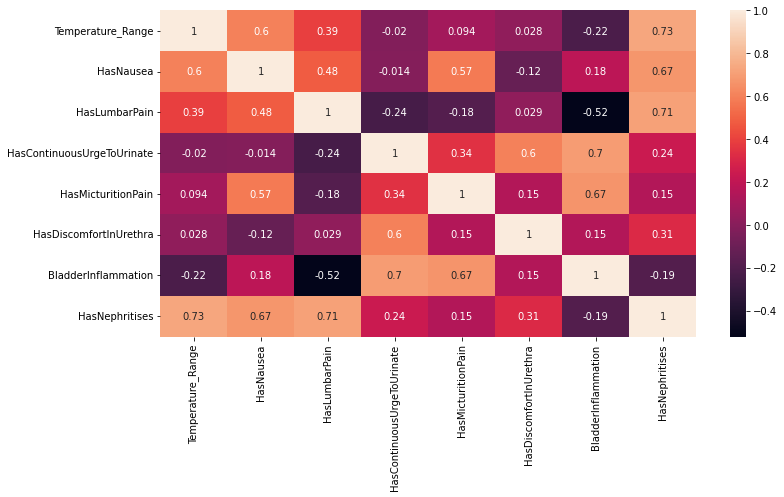

In [22]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(inflammations_df.corr(), annot=True)

From the above table, it is clear that if a person has a continuous urge to urinate or has micturition pains, he has high chances of having a bladder inflammation. On the other hand, if a person has very high fever and has lumbar pain, there are high chances he has nephritises. We can also see that lumbar pain has a negative correlation with bladder inflammation of patients.

Now our data is ready. We will proceed with modelling. For this, we will divide the data into train and test sets

First we will seperate the target variables with the independant features

In [23]:
X = inflammations_df.drop(["BladderInflammation", "HasNephritises"], axis="columns")
X.head()

,Temperature_Range,HasNausea,HasLumbarPain,HasContinuousUrgeToUrinate,HasMicturitionPain,HasDiscomfortInUrethra
0,0,0,1,0,0,0
1,0,0,0,1,1,1
2,0,0,1,0,0,0
3,0,0,0,1,1,1
4,0,0,1,0,0,0


In [24]:
Y_bladderInflammation = inflammations_df["BladderInflammation"]
Y_hasNephritises = inflammations_df["HasNephritises"]

First we will train the model for bladder information and then we will train for acute nephritises
We are dividing the dataset into 70-30 where 70% is the training set and 30% is part of the test set

In [25]:
X_train_bladderInf, X_test_bladderInf, y_train_bladderInf, y_test_bladderInf = train_test_split(X, Y_bladderInflammation, test_size=0.3)

Let us check the size of our training dataset and test dataset

In [26]:
print("Train dataset:",X_train_bladderInf.shape)
print("Test dataset:",X_test_bladderInf.shape)

Train dataset: (84, 6)
Test dataset: (36, 6)


Let us first use Decision Tree classifier. For that we will use DecisionTreeClassifier from the sklearn package

In [27]:
model_DT = DecisionTreeClassifier().fit(X_train_bladderInf,y_train_bladderInf)

Let us now predict the model using the test data

In [28]:
score_DT= model_DT.score(X_test_bladderInf, y_test_bladderInf)

In [29]:
print(score_DT)

1.0


In [30]:
y_pred_DT = model_DT.predict(X_test_bladderInf)

In [31]:
print(y_pred_DT)

[0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0]


Let us now check the performance of the model

In [32]:
f1_score_DT = f1_score(y_test_bladderInf, y_pred_DT)
precision_score_DT = precision_score(y_pred_DT, y_test_bladderInf)
accuracy_score_DT = accuracy_score(y_pred_DT, y_test_bladderInf)
recall_score_DT = recall_score(y_pred_DT, y_test_bladderInf)
confusion_matrix_bladderInf = confusion_matrix(y_test_bladderInf, y_pred_DT)

In [33]:
print("F1 Score for bladder inflammation:", f1_score_DT)
print("Precision Score for bladder inflammation:", precision_score_DT)
print("Accuracy Score for bladder inflammation:", accuracy_score_DT)
print("Recall Score for bladder inflammation:", recall_score_DT)

F1 Score for bladder inflammation: 1.0
Precision Score for bladder inflammation: 1.0
Accuracy Score for bladder inflammation: 1.0
Recall Score for bladder inflammation: 1.0


In [34]:
print(confusion_matrix_bladderInf)

[[24  0]
 [ 0 12]]


We can see there are 24 true positives and 12 true negatives. No patient has been classified wrongly as there are no false positives or false negatives

Now let us perform the same steps for acute nephritises

In [35]:
X_train_neph, X_test_neph, y_train_neph, y_test_neph = train_test_split(X, Y_hasNephritises, test_size=0.3)

In [36]:
print("Train dataset:",X_train_neph.shape)
print("Test dataset:",X_test_neph.shape)

Train dataset: (84, 6)
Test dataset: (36, 6)


In [37]:
model_DT_neph = DecisionTreeClassifier().fit(X_train_neph,y_train_neph)

In [38]:
score_DT_neph= model_DT_neph.score(X_test_neph, y_test_neph)
print(score_DT_neph)

1.0


In [39]:
y_pred_DT_neph = model_DT_neph.predict(X_test_neph)
print(y_pred_DT_neph)

[0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1]


In [40]:
f1_score_DT_neph = f1_score(y_test_neph, y_pred_DT_neph)
precision_score_DT_neph = precision_score(y_pred_DT_neph, y_test_neph)
accuracy_score_DT_neph = accuracy_score(y_pred_DT_neph, y_test_neph)
recall_score_DT_neph = recall_score(y_pred_DT_neph, y_test_neph)
confusion_matrix_bladderInf_neph = confusion_matrix(y_test_neph, y_pred_DT_neph)

In [41]:
print("F1 Score for bladder inflammation:", f1_score_DT_neph)
print("Precision Score for bladder inflammation:", precision_score_DT_neph)
print("Accuracy Score for bladder inflammation:", accuracy_score_DT_neph)
print("Recall Score for bladder inflammation:", recall_score_DT_neph)

F1 Score for bladder inflammation: 1.0
Precision Score for bladder inflammation: 1.0
Accuracy Score for bladder inflammation: 1.0
Recall Score for bladder inflammation: 1.0


In [42]:
print(confusion_matrix_bladderInf_neph)

[[22  0]
 [ 0 14]]


We see that the decision tree classifier predicted 22 patients as positive and 14 as negative for acute nephritises. Also the accuracy, recall and F1 score are all 100%

Next, we will train the data on Random Forest classifier. Like above, first we will train for Bladder inflammation and then for acute nephritises

In [43]:
X_train_bladderInf, X_test_bladderInf, y_train_bladderInf, y_test_bladderInf = train_test_split(X, Y_bladderInflammation, test_size=0.3)

In [44]:
print("Train dataset:",X_train_bladderInf.shape)
print("Test dataset:",X_test_bladderInf.shape)

Train dataset: (84, 6)
Test dataset: (36, 6)


In [45]:
model_RC_bladderInf = RandomForestClassifier().fit(X_train_bladderInf, y_train_bladderInf)

In [46]:
score_RC_bladderInf = model_RC_bladderInf.score(X_test_bladderInf, y_test_bladderInf)
print(score_RC_bladderInf)
y_pred_RC_bladderInf = model_RC_bladderInf.predict(X_test_bladderInf)
print(y_pred_RC_bladderInf)

1.0
[1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1]


In [47]:
f1_score_RC = f1_score(y_test_bladderInf, y_pred_RC_bladderInf)
precision_score_RC = precision_score(y_pred_RC_bladderInf, y_test_bladderInf)
accuracy_score_RC = accuracy_score(y_pred_RC_bladderInf, y_test_bladderInf)
recall_score_RC = recall_score(y_pred_RC_bladderInf, y_test_bladderInf)
confusion_matrix_bladderInf_RC = confusion_matrix(y_test_bladderInf, y_pred_RC_bladderInf)

In [48]:
print("F1 Score for bladder inflammation:", f1_score_RC)
print("Precision Score for bladder inflammation:", precision_score_RC)
print("Accuracy Score for bladder inflammation:", accuracy_score_RC)
print("Recall Score for bladder inflammation:", recall_score_RC)

F1 Score for bladder inflammation: 1.0
Precision Score for bladder inflammation: 1.0
Accuracy Score for bladder inflammation: 1.0
Recall Score for bladder inflammation: 1.0


In [49]:
print(confusion_matrix_bladderInf_RC)

[[19  0]
 [ 0 17]]


We can see that random forest classifier also gives accurate predictions for bladder inflammation. Let's see how it does for acute nephritises

In [50]:
X_train_neph, X_test_neph, y_train_neph, y_test_neph = train_test_split(X, Y_hasNephritises, test_size=0.3)

In [51]:
print("Train dataset:",X_train_neph.shape)
print("Test dataset:",X_test_neph.shape)

Train dataset: (84, 6)
Test dataset: (36, 6)


In [52]:
model_RC_neph = RandomForestClassifier().fit(X_train_neph, y_train_neph)

In [53]:
score_RC_neph = model_RC_neph.score(X_test_neph, y_test_neph)
print(score_RC_neph)
y_pred_RC_neph = model_RC_neph.predict(X_test_neph)
print(y_pred_RC_neph)

1.0
[1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1]


In [54]:
f1_score_RC_neph = f1_score(y_test_neph, y_pred_RC_neph)
precision_score_RC_neph = precision_score(y_pred_RC_neph, y_test_neph)
accuracy_score_RC_neph = accuracy_score(y_pred_RC_neph, y_test_neph)
recall_score_RC_neph = recall_score(y_pred_RC_neph, y_test_neph)
confusion_matrix_RC_neph = confusion_matrix(y_test_neph, y_pred_RC_neph)

In [55]:
print("F1 Score for acute nephritises:", f1_score_RC_neph)
print("Precision Score for acute nephritises:", precision_score_RC_neph)
print("Accuracy Score for acute nephritises:", accuracy_score_RC_neph)
print("Recall Score for acute nephritises:", recall_score_RC_neph)

F1 Score for acute nephritises: 1.0
Precision Score for acute nephritises: 1.0
Accuracy Score for acute nephritises: 1.0
Recall Score for acute nephritises: 1.0


In [56]:
print(confusion_matrix_RC_neph)

[[14  0]
 [ 0 22]]


We can see that the random forest classifier has an accuracy of 100% for acute nephritises also apart from the other measures which also have a perfect score. Therefore we can clearly say that both the models have performed equally well with this dataset.